In [4]:
!pip install datasets

In [5]:
from datasets import load_dataset

ds = load_dataset("Hello-SimpleAI/HC3", "all")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [21]:
chatgpt_content = ds['train']['chatgpt_answers'][0:2000]
chatgpt = [item for sublist in chatgpt_content for item in sublist]
human_content = ds['train']['human_answers'][0:2000]
human = [item for sublist in human_content for item in sublist]

In [22]:
# Create DataFrame
df = pd.DataFrame({
    'text': chatgpt + human,  # Combine both lists
    'label': ['chatgpt_content'] * len(chatgpt) + ['human_content'] * len(human)  # Assign labels
})


In [7]:
all_text = chatgpt + human


In [8]:
len(all_text)

8000

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
# create vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

In [10]:
# vectorizer the text documents
vectorized_documents = vectorizer.fit_transform(all_text)

In [11]:
from sklearn.decomposition import PCA
# reduce the dimensionality of the data using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(vectorized_documents.toarray())

In [13]:

from sklearn.cluster import KMeans
# cluster the documents using k-means
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, n_init=5,
                max_iter=500, random_state=42)
kmeans.fit(vectorized_documents)

KMeans(max_iter=500, n_clusters=2, n_init=5, random_state=42)

In [23]:
df['document'] = all_text
df['cluster'] = kmeans.labels_

In [27]:
df.head(50)

,text,label,document,cluster
0,There are many different best seller lists tha...,chatgpt_content,There are many different best seller lists tha...,0
1,Salt is used on roads to help melt ice and sno...,chatgpt_content,Salt is used on roads to help melt ice and sno...,0
2,There are a few reasons why we still have SD (...,chatgpt_content,There are a few reasons why we still have SD (...,0
3,It is generally not acceptable or ethical to a...,chatgpt_content,It is generally not acceptable or ethical to a...,1
4,After the Wright Brothers made the first power...,chatgpt_content,After the Wright Brothers made the first power...,1
5,The color of your eyes is determined by the am...,chatgpt_content,The color of your eyes is determined by the am...,0
6,The First Amendment to the United States Const...,chatgpt_content,The First Amendment to the United States Const...,1
7,There are a few different factors that can con...,chatgpt_content,There are a few different factors that can con...,1
8,Magic: The Gathering is a collectible card gam...,chatgpt_content,Magic: The Gathering is a collectible card gam...,0
9,Prions are tiny particles that can cause serio...,chatgpt_content,Prions are tiny particles that can cause serio...,0


In [15]:
import pandas as pd
# create a dataframe to store the results
results = pd.DataFrame()
results['document'] = all_text
results['cluster'] = kmeans.labels_

In [16]:
results.head()

,document,cluster
0,There are many different best seller lists tha...,0
1,Salt is used on roads to help melt ice and sno...,0
2,There are a few reasons why we still have SD (...,0
3,It is generally not acceptable or ethical to a...,1
4,After the Wright Brothers made the first power...,1


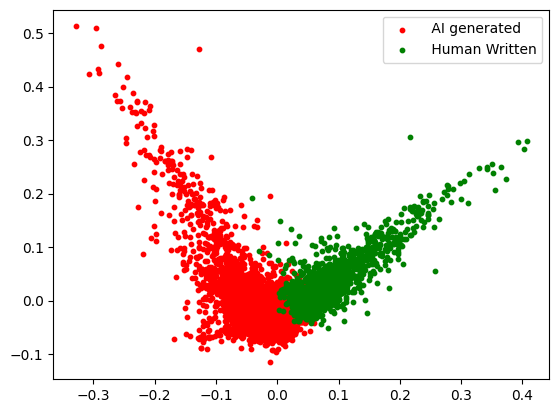

In [18]:
import matplotlib.pyplot as plt

# plot the results
colors = ['red', 'green']
cluster = ['AI generated','Human Written']
for i in range(num_clusters):
    plt.scatter(reduced_data[kmeans.labels_ == i, 0],
                reduced_data[kmeans.labels_ == i, 1],
                s=10, color=colors[i],
                label=f' {cluster[i]}')
plt.legend()
plt.show()